In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import necesssity library
from sklearn.impute import SimpleImputer #  Handling missing values
from sklearn.preprocessing import StandardScaler # Handling Featturing Scaling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Converting categorical to numerical
from imblearn.over_sampling import SMOTE  # Handling imbalanced data with oversampling
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# split data into train and test
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
#Define numerical column
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

#Define categorical column
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE','SCC', 'CALC', 'MTRANS']

In [6]:
# Mapping target columns
map_target = {'Obesity_Type_I': 'Obesity',
             'Obesity_Type_II': 'Obesity',
             'Obesity_Type_III': 'Extreme_Obesity',
             'Overweight_Level_I':'Overweight',
             'Overweight_Level_II':'Overweight',
             'Normal_Weight':'Normal',
             'Insufficient_Weight':'Underweight'}

In [7]:
df['NObeyesdad'] = df['NObeyesdad'].map(map_target)

In [8]:
df['NObeyesdad'] = LabelEncoder().fit_transform(df['NObeyesdad'])

In [9]:
df['NObeyesdad'].value_counts()

2    648
3    566
0    324
1    282
4    267
Name: NObeyesdad, dtype: int64

### Data is imbalanced

In [10]:
# Split dependent and independent 
X = df.drop('NObeyesdad',axis=1)
y = df['NObeyesdad']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [12]:
# Define numpipeline

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    
])

#define catpipeline
cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
])

In [13]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [14]:
X_train

,num__Age,num__Height,num__Weight,num__FCVC,num__NCP,num__CH2O,num__FAF,num__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
0,-1.000436,0.069753,-1.368665,-1.471636,0.980819,-1.478298,-0.721195,0.542588,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.101629,0.916101,1.093049,-1.296035,0.398466,0.059780,0.430085,-0.459683,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.118512,0.093183,0.508621,-0.799179,0.398466,-0.008018,-1.136735,0.368098,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.973380,-0.001870,-1.362728,-1.255055,0.398466,-1.389621,-0.230304,1.557687,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.248899,-0.925958,0.702115,1.080460,0.398466,-1.252515,-1.117596,-0.209188,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.391241,-0.316130,-1.369382,1.041707,0.398466,1.584874,-0.098899,0.940944,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,0.790289,0.729769,0.983432,-0.229571,0.398466,0.099412,-1.216549,0.089818,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,2.794237,-1.382532,-0.166892,0.182337,-1.754222,-0.215847,0.023397,-1.105180,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1458,1.946802,0.512301,1.199377,-0.624692,0.398466,0.118815,-0.508590,-1.105180,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [16]:
X_train

,num__Age,num__Height,num__Weight,num__FCVC,num__NCP,num__CH2O,num__FAF,num__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
0,-1.000436,0.069753,-1.368665,-1.471636,0.980819,-1.478298,-0.721195,0.542588,1.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.101629,0.916101,1.093049,-1.296035,0.398466,0.059780,0.430085,-0.459683,0.000000,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.118512,0.093183,0.508621,-0.799179,0.398466,-0.008018,-1.136735,0.368098,0.000000,1.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.973380,-0.001870,-1.362728,-1.255055,0.398466,-1.389621,-0.230304,1.557687,0.000000,1.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.248899,-0.925958,0.702115,1.080460,0.398466,-1.252515,-1.117596,-0.209188,1.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,-0.696163,0.704446,-1.090206,-0.799179,1.577748,0.864913,1.148615,1.948994,0.000000,1.000000,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2206,-0.431592,-0.044239,-1.364868,1.025210,0.665361,1.159249,-0.199337,0.949191,1.000000,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2207,-1.008219,1.760053,-0.992156,1.080460,1.255683,-0.008018,1.157555,-0.397291,0.000000,1.000000,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2208,-0.768945,-1.899427,-1.669873,1.028009,-2.111845,-0.299874,-1.161318,0.089514,1.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
y_train.value_counts()

4    442
2    442
0    442
3    442
1    442
Name: NObeyesdad, dtype: int64

## Data Is Balanced

# ML Algorithm

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [19]:
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

In [24]:
# Create a dictionary of classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'KNN Classifier': KNeighborsClassifier(),
    'XGBoost Classifier': XGBClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

In [25]:
# Create an empty dictionary to store the results
results = {}

C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


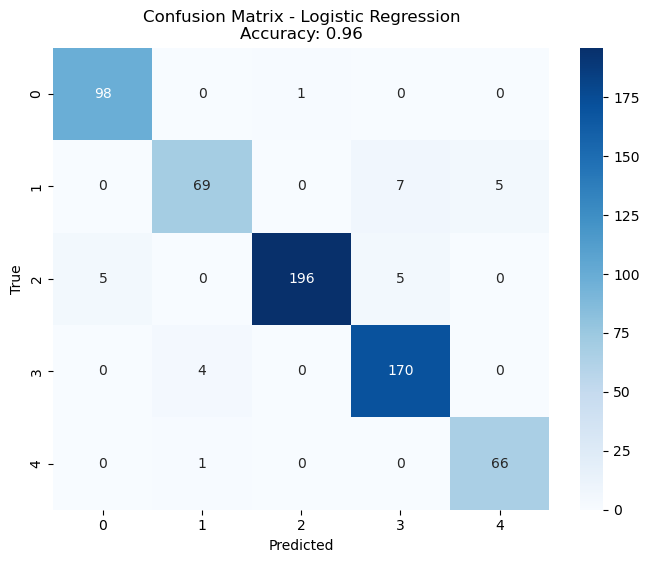

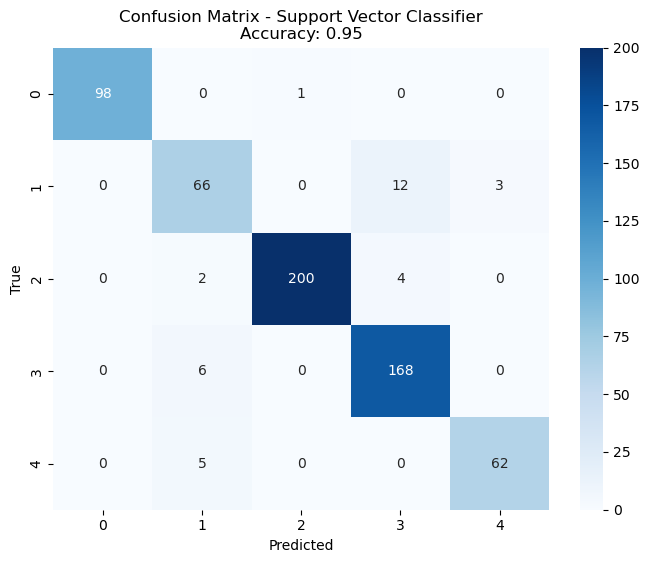

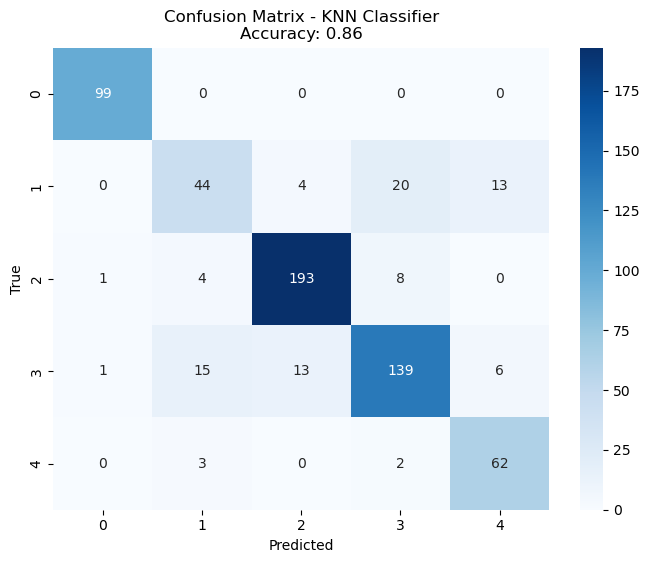

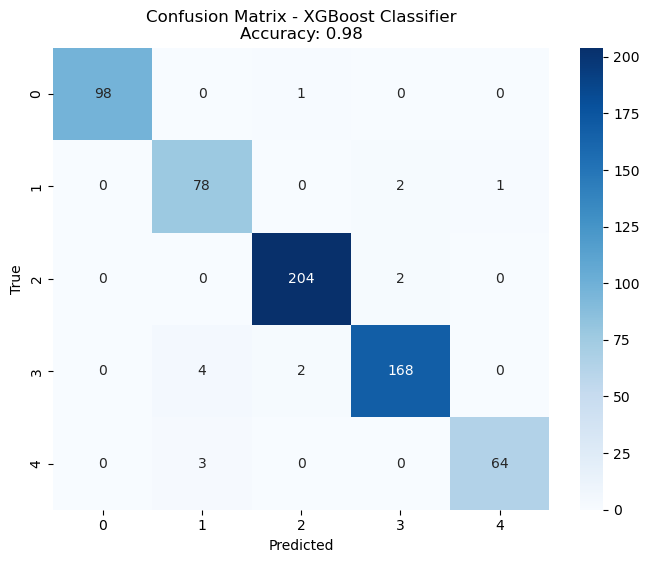

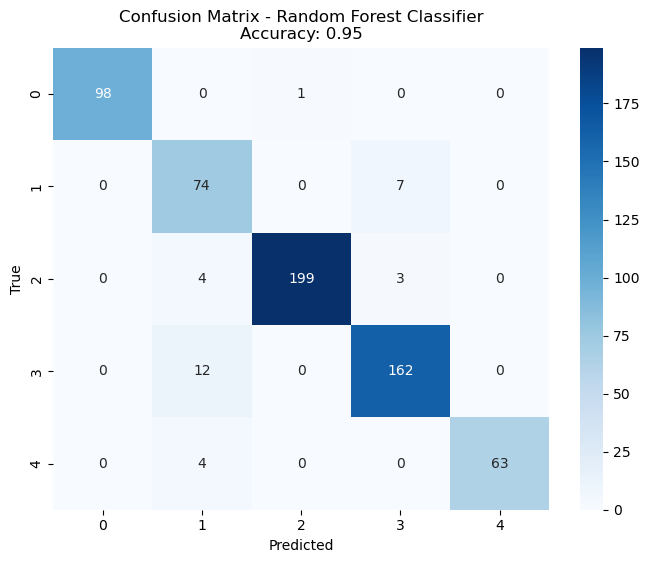

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
# Iterate over each model
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate classification report
    cr = classification_report(y_test,y_pred)
    
    # Store the accuracy and confusion matrix in the results dictionary
    results[model_name] = {'Accuracy': accuracy, 'Confusion Matrix': cm , 'Classification Report': cr}
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',)
    plt.title(f'Confusion Matrix - {model_name}\nAccuracy: {accuracy:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

#### With Optuna Hyperparameter tunning

In [29]:
import optuna

# Define the objective function to optimize
def objective(trial):
    # Define the hyperparameters to tune
    C = trial.suggest_loguniform('C', 0.001, 100.0)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    
    # Create the model with the suggested hyperparameters
    model = LogisticRegression(C=C, penalty=penalty, solver=solver)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy


# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters and accuracy
best_params = study.best_params
best_accuracy = study.best_value

# Create a Logistic Regression model with the best hyperparameters
best_model = LogisticRegression(**best_params)

# Fit the best model on the full training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Test Accuracy:", accuracy)


[I 2023-06-19 15:54:40,671] A new study created in memory with name: no-name-7b8a702c-2b44-4c2c-91fb-0adbf26acc98
C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 0.001, 100.0)
[I 2023-06-19 15:54:40,801] Trial 0 finished with value: 0.784688995215311 and parameters: {'C': 0.40302756003241047, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.784688995215311.
C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 0.001, 100.0)
[I 2023-06

C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 0.001, 100.0)
C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-06-19 15:54:43,438] Trial 13 finished with value: 0.9744816586921851 and parameters: {'C': 14.168531419926753, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 11 with value: 0.9792663476874003.
C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead

C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-06-19 15:54:47,230] Trial 24 finished with value: 0.9744816586921851 and parameters: {'C': 12.309158455520135, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 11 with value: 0.9792663476874003.
C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 0.001, 100.0)
C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-06-19 15:54:47,556] Trial 25 finished with value: 0.9792663476874003 and parameters: {'C': 33.526

C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-06-19 15:54:51,937] Trial 36 finished with value: 0.9744816586921851 and parameters: {'C': 10.749690982742809, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 11 with value: 0.9792663476874003.
C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 0.001, 100.0)
C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-06-19 15:54:52,254] Trial 37 finished with value: 0.9776714513556619 and parameters: {'C': 2.7172

C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-06-19 15:54:55,020] Trial 48 finished with value: 0.9744816586921851 and parameters: {'C': 15.437201635519674, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 11 with value: 0.9792663476874003.
C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 0.001, 100.0)
[I 2023-06-19 15:54:55,066] Trial 49 finished with value: 0.7878787878787878 and parameters: {'C': 6.6794676510681175, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 11 with value: 0.9792663476874003.
C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureW

C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 0.001, 100.0)
C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-06-19 15:54:57,661] Trial 60 finished with value: 0.9744816586921851 and parameters: {'C': 15.712182482393546, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 11 with value: 0.9792663476874003.
C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead

C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 0.001, 100.0)
C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-06-19 15:55:00,261] Trial 72 finished with value: 0.9792663476874003 and parameters: {'C': 68.90836423873733, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 11 with value: 0.9792663476874003.
C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 0.001, 100.0)
C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-06-19 15:55:03,571] Trial 84 finished with value: 0.9792663476874003 and parameters: {'C': 66.98353004423363, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 11 with value: 0.9792663476874003.
C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 0.001, 100.0)
C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-06-19 15:55:07,071] Trial 96 finished with value: 0.9792663476874003 and parameters: {'C': 82.91278963165271, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 11 with value: 0.9792663476874003.
C:\Users\miqba\AppData\Local\Temp\ipykernel_25304\2961570384.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

Best Hyperparameters: {'C': 61.72281144761127, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy: 0.9792663476874003
Test Accuracy: 0.9792663476874003


C:\Users\miqba\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#import optuna
## Define the objective function to optimize
#def objective(trial):
#    # Define the hyperparameters to tune for each classifier
#    if model_name == 'Logistic Regression':
#        C = trial.suggest_loguniform('C', 0.01, 10.0)
#        solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs'])
#        model = LogisticRegression(C=C, solver=solver)
#    elif model_name == 'Support Vector Classifier':
#        C = trial.suggest_loguniform('C', 0.01, 10.0)
#        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
#        model = SVC(C=C, kernel=kernel, probability=True)
#    elif model_name == 'KNN Classifier':
#        n_neighbors = trial.suggest_int('n_neighbors', 1, 10)
#        model = KNeighborsClassifier(n_neighbors=n_neighbors)
#    elif model_name == 'XGBoost Classifier':
#        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)
#        n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
#        model = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators)
#    elif model_name == 'Random Forest Classifier':
#        n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
#        max_depth = trial.suggest_int('max_depth', 3, 10)
#        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
#        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
#    
#    # Fit the model on the training data
#    model.fit(X_train, y_train)
#    
#    # Make predictions on the validation data
#    y_pred = model.predict(X_test)
#    
#    # Calculate the accuracy score
#    accuracy = accuracy_score(y_test, y_pred)
#    
#    return accuracy

In [ ]:
#import warnings
#
## Ignore warning messages
#warnings.filterwarnings('ignore')
#
## Perform hyperparameter optimization for each classifier
#results = {}
#for model_name, model in models.items():
#    study = optuna.create_study(direction='maximize')
#    study.optimize(objective, n_trials=100)
#    
#    best_params = study.best_params
#    best_accuracy = study.best_value
#    
#    results[model_name] = {'Best Hyperparameters': best_params, 'Best Accuracy': best_accuracy}
#
## Display the results
#for model_name, result in results.items():
#    print(model_name)
#    print('Best Hyperparameters:', result['Best Hyperparameters'])
#    print('Best Accuracy:', result['Best Accuracy'])
#    print()